# Задача 1. Линейная регрессия и градиентный спуск

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

%precision %.4f
%matplotlib inline
%load_ext nb_black
pd.set_option("display.float_format", lambda x: "%.4f" % x)
np.set_printoptions(suppress=True)
import warnings

warnings.filterwarnings("ignore")  # отключаем предупреждения

<IPython.core.display.Javascript object>

In [3]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [4]:
from src import (
    MiniBatchGradientDescent,
    StochasticGradientDescent,
    GradientDescent,
    LinearRegression as MyLinearRegression,
)

<IPython.core.display.Javascript object>

## Проверка на синтетических данных

In [16]:
x = np.linspace(0, 1, 50)
y = 1.2 * x + 0.5 + np.random.normal(scale=0.2, size=x.shape)
X = x[:, None]
X_ = MyLinearRegression._LinearRegression__add_ones_column(X)

<IPython.core.display.Javascript object>

In [17]:
my_model_mini = MyLinearRegression(
    MiniBatchGradientDescent(learning_rate=lambda k: 0.1), 0.0, 200
)
my_model_mini.fit(X, y)
my_y_pred_mini = my_model_mini.predict(X)

<IPython.core.display.Javascript object>

In [18]:
my_model_stoch = MyLinearRegression(
    StochasticGradientDescent(learning_rate=lambda k: 0.1), 0.0, 200
)
my_model_stoch.fit(X, y)
my_y_pred_stoch = my_model_stoch.predict(X)

<IPython.core.display.Javascript object>

In [19]:
my_model = MyLinearRegression(GradientDescent(learning_rate=lambda k: 0.1), 0.0, 200)
my_model.fit(X, y)
my_y_pred = my_model.predict(X)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

<IPython.core.display.Javascript object>

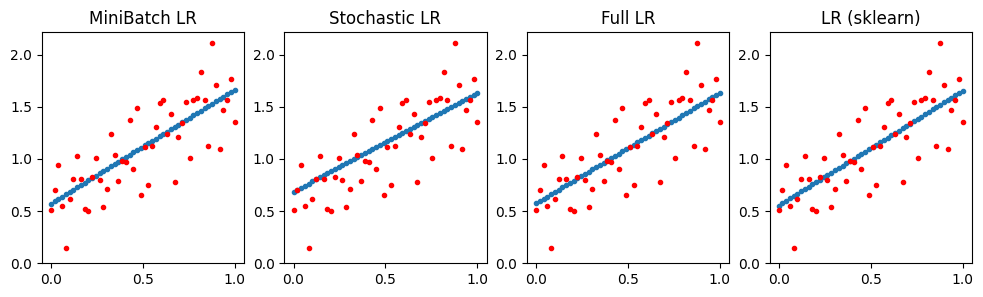

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

ax[0].plot(x, my_y_pred_mini, ".")
ax[0].plot(x, y, ".", color="r")
ax[0].set_ylim(ymin=0)
ax[0].title.set_text("MiniBatch LR")

ax[1].plot(x, my_y_pred_stoch, ".")
ax[1].plot(x, y, ".", color="r")
ax[1].set_ylim(ymin=0)
ax[1].title.set_text("Stochastic LR")

ax[2].plot(x, my_y_pred, ".")
ax[2].plot(x, y, ".", color="r")
ax[2].set_ylim(ymin=0)
ax[2].title.set_text("Full LR")

ax[3].plot(x, y_pred, ".")
ax[3].plot(x, y, ".", color="r")
ax[3].set_ylim(ymin=0)
ax[3].title.set_text("LR (sklearn)")

plt.show(fig)

In [21]:
from sklearn.metrics import mean_squared_error

print("Full LR = %.4f" % mean_squared_error(y, my_y_pred, squared=False))
print("LR (sklearn) RMSE = %.4f" % mean_squared_error(y, y_pred, squared=False))
print(
    "Stochastic LR RMSE = %.4f" % mean_squared_error(y, my_y_pred_stoch, squared=False)
)
print("MiniBatch LR RMSE = %.4f" % mean_squared_error(y, my_y_pred_mini, squared=False))

Full LR = 0.2619
LR (sklearn) RMSE = 0.2616
Stochastic LR RMSE = 0.2716
MiniBatch LR RMSE = 0.2620


<IPython.core.display.Javascript object>

## Seoul Bike Sharing Demand

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)

### Задача

Нам требуется предсказать значение количества арендованных велосипедов

### Features

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of the day
- Temperature-Temperature in Celsius
- Humidity (%)
- Windspeed (m/s)
- Visibility (10m)
- Dew point temperature (Celsius)
- Solar radiation (MJ/m2)
- Rainfall (mm)
- Snowfall (cm)
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Первичные преобразования характеристик

In [22]:
df = pd.read_csv("../data/bikes_rent/SeoulBikeData.csv", encoding="cp1252")

<IPython.core.display.Javascript object>

In [23]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2000,37,2.2000,2000,-17.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5000,38,0.8000,2000,-17.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0000,39,1.0000,2000,-17.7000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2000,40,0.9000,2000,-17.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0000,36,2.3000,2000,-18.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes


<IPython.core.display.Javascript object>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<IPython.core.display.Javascript object>

In [25]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

<IPython.core.display.Javascript object>

In [26]:
df = df.rename(
    columns={
        "Temperature(°C)": "Temperature",
        "Humidity(%)": "Humidity",
        "Rainfall(mm)": "Rainfall",
        "Snowfall (cm)": "Snowfall",
        "Wind speed (m/s)": "Wind speed",
        "Visibility (10m)": "Visibility",
        "Solar Radiation (MJ/m2)": "Solar Radiation",
        "Dew point temperature(°C)": "Dew point temperature",
        "Seasons": "Season",
    }
)

<IPython.core.display.Javascript object>

In [27]:
df.shape

(8760, 14)

<IPython.core.display.Javascript object>

In [28]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Season                   0
Holiday                  0
Functioning Day          0
dtype: int64

<IPython.core.display.Javascript object>

Пропусков значений нет

In [29]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Season', 'Holiday', 'Functioning Day'],
      dtype='object')

<IPython.core.display.Javascript object>

## EDA

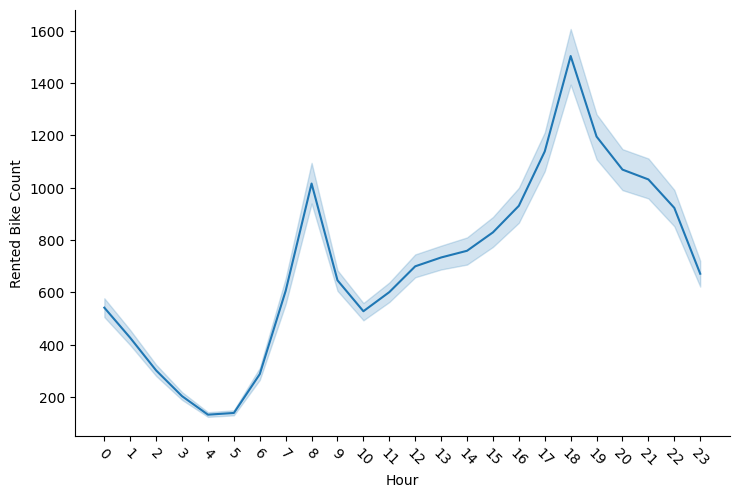

<IPython.core.display.Javascript object>

In [30]:
import matplotlib.ticker as ticker

ax = sns.relplot(
    x="Hour", y="Rented Bike Count", data=df, kind="line", height=5, aspect=1.5
)
plt.xticks(rotation=-45)
ax.set(xticks=df.Hour.unique())
plt.show()

Можно заметить, что наибольшее количество велосипедов в среднем арендуют в 18 часов

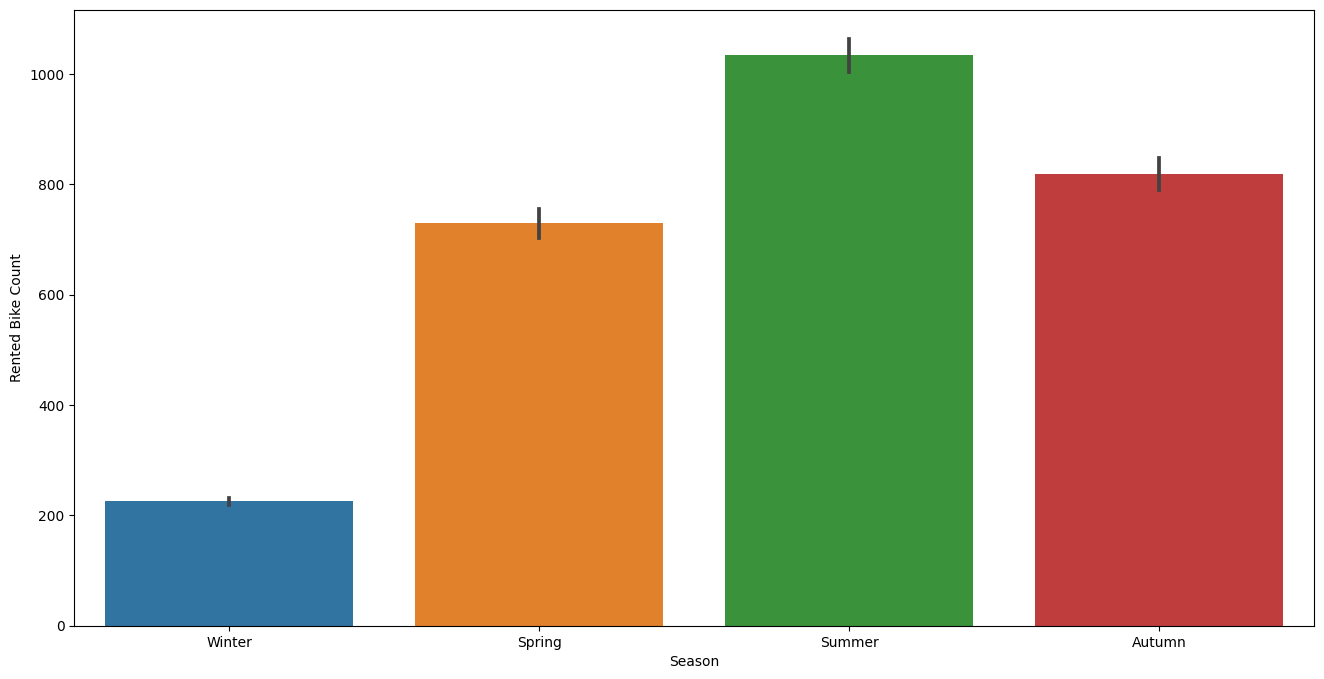

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="Season", y="Rented Bike Count", data=df)
plt.show()

Зимой количество арендованных велосипедов значительно меньше, чем в другие сезоны

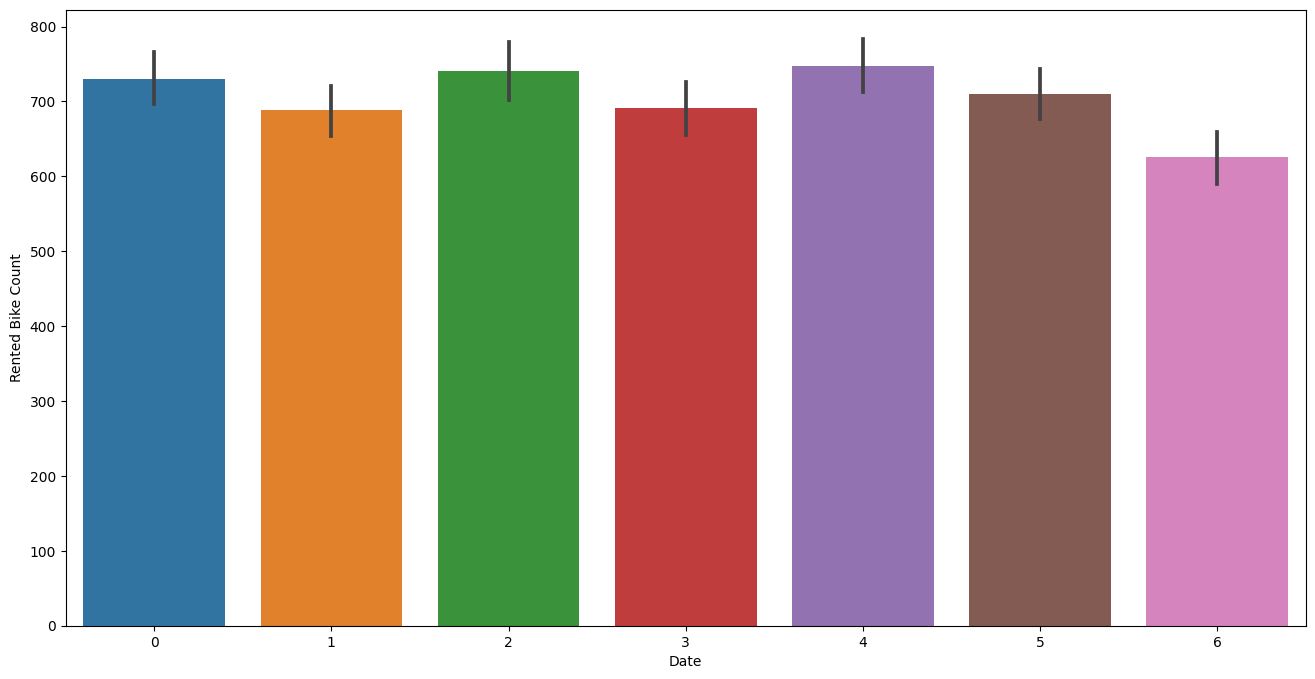

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=df.Date.dt.dayofweek, y="Rented Bike Count", data=df)

Можно заметить, что количество арендованых велосипедов в среднем не сильно зависит от дня недели

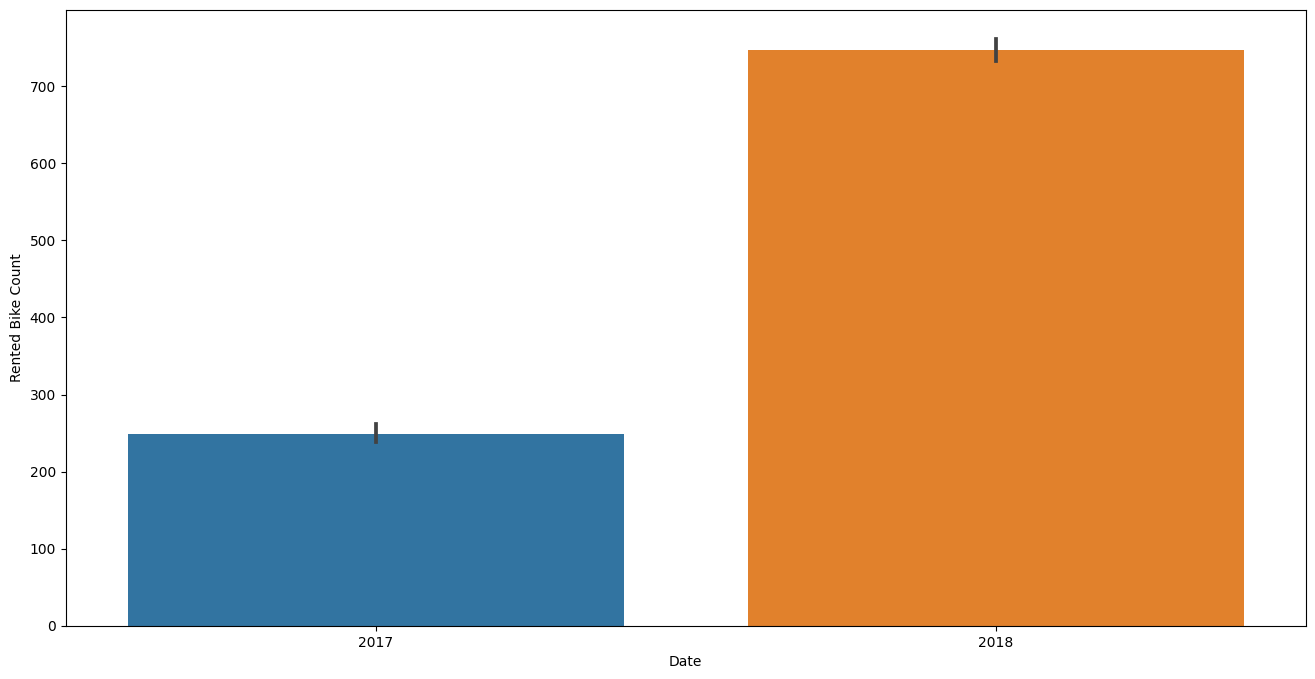

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=df.Date.dt.year, y="Rented Bike Count", data=df)

Видно, что в 2017 году число арендованных велосипедов было почти в три раза меньше, чем в 2018

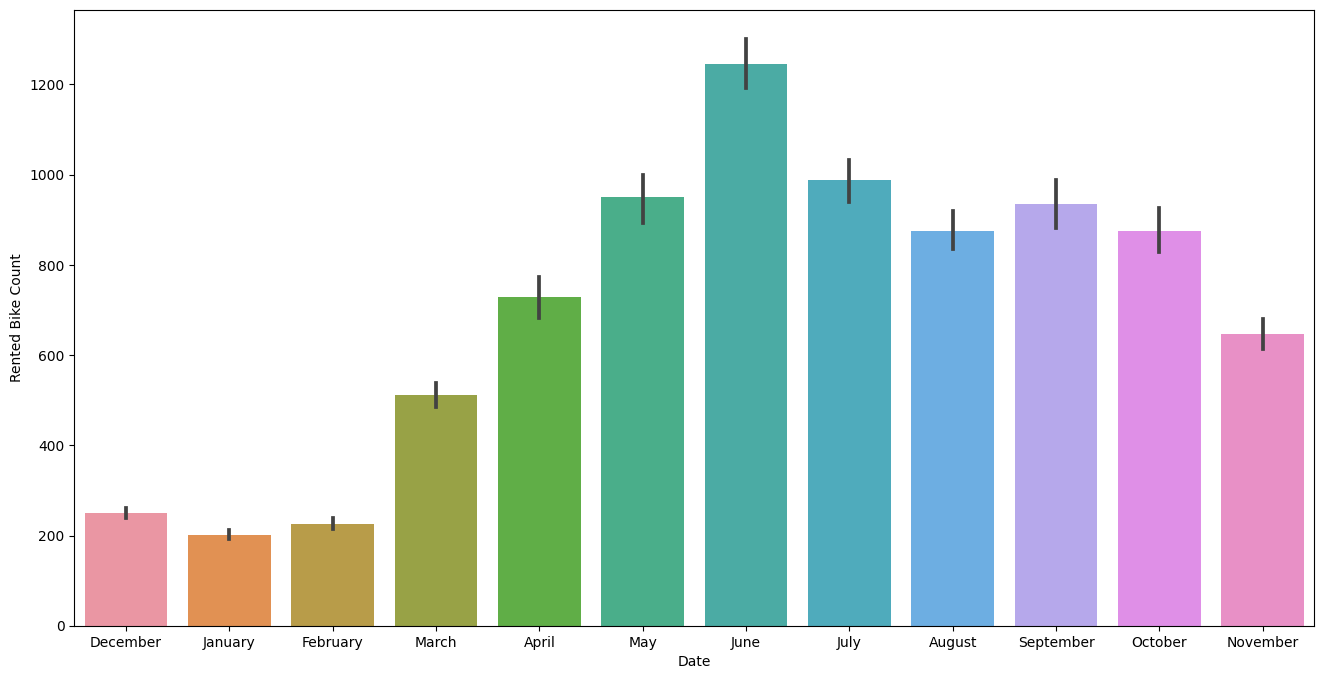

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=df.Date.dt.month_name(), y="Rented Bike Count", data=df)

Преобразуем данные, закодированные в дате, в отдельные признаки

In [35]:
df["Month"] = df.Date.dt.month
df["Year"] = df.Date.dt.year
df["Day of Month"] = df.Date.dt.day
df["Day Of Week"] = df.Date.dt.dayofweek

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Month', ylabel='Season'>

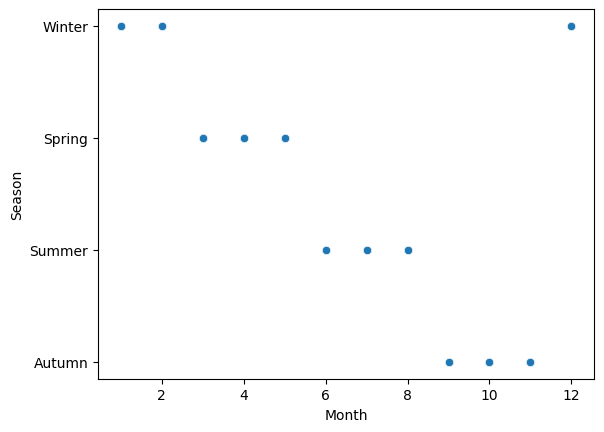

<IPython.core.display.Javascript object>

In [36]:
sns.scatterplot(data=df, x="Month", y="Season")

In [37]:
df.drop(columns=["Date"], inplace=True)

<IPython.core.display.Javascript object>

In [38]:
from sklearn.model_selection import train_test_split

y = df["Rented Bike Count"]
X = df.drop(columns=["Rented Bike Count"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

<IPython.core.display.Javascript object>

In [39]:
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

<IPython.core.display.Javascript object>

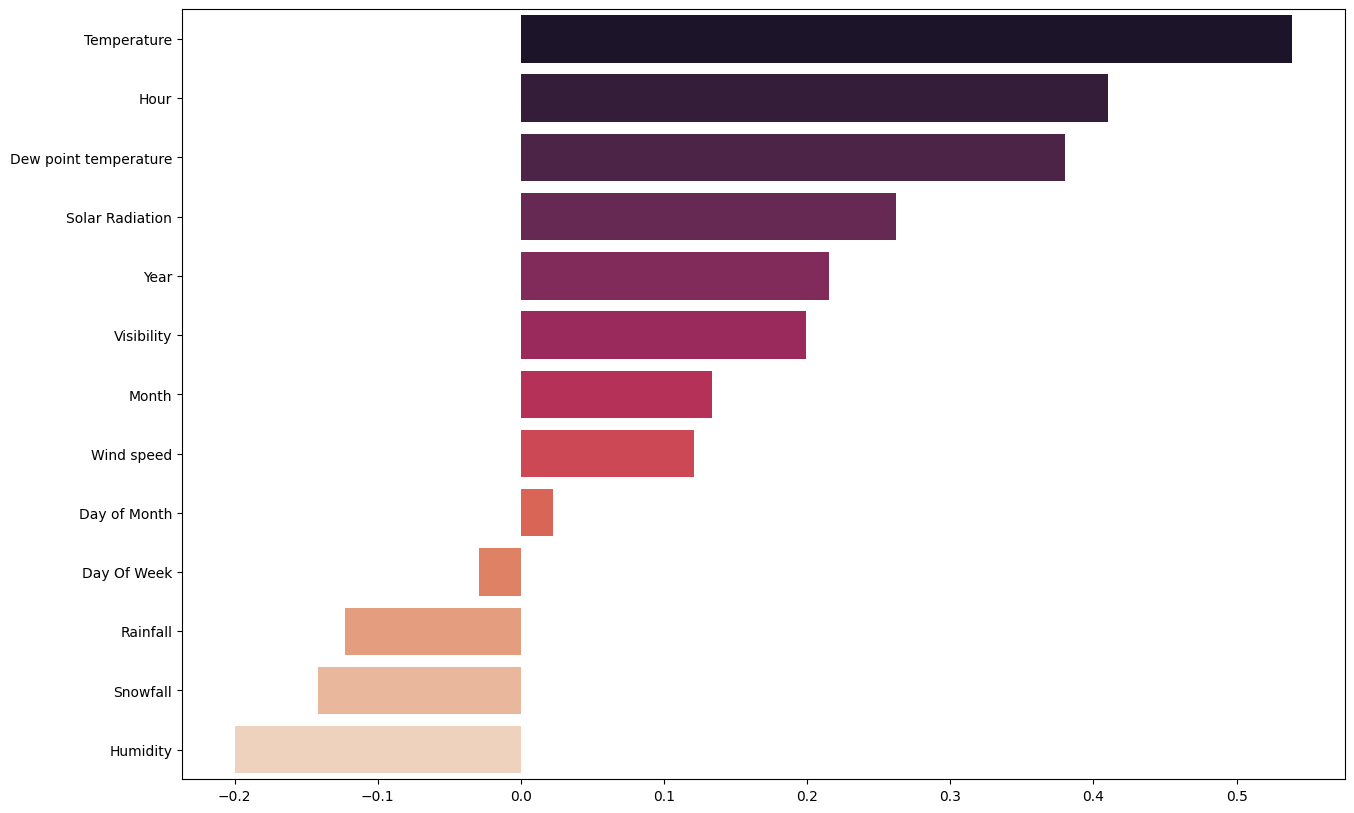

<IPython.core.display.Javascript object>

In [40]:
correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)

Целевой признак наиболее выраженно коррелирует с температурой

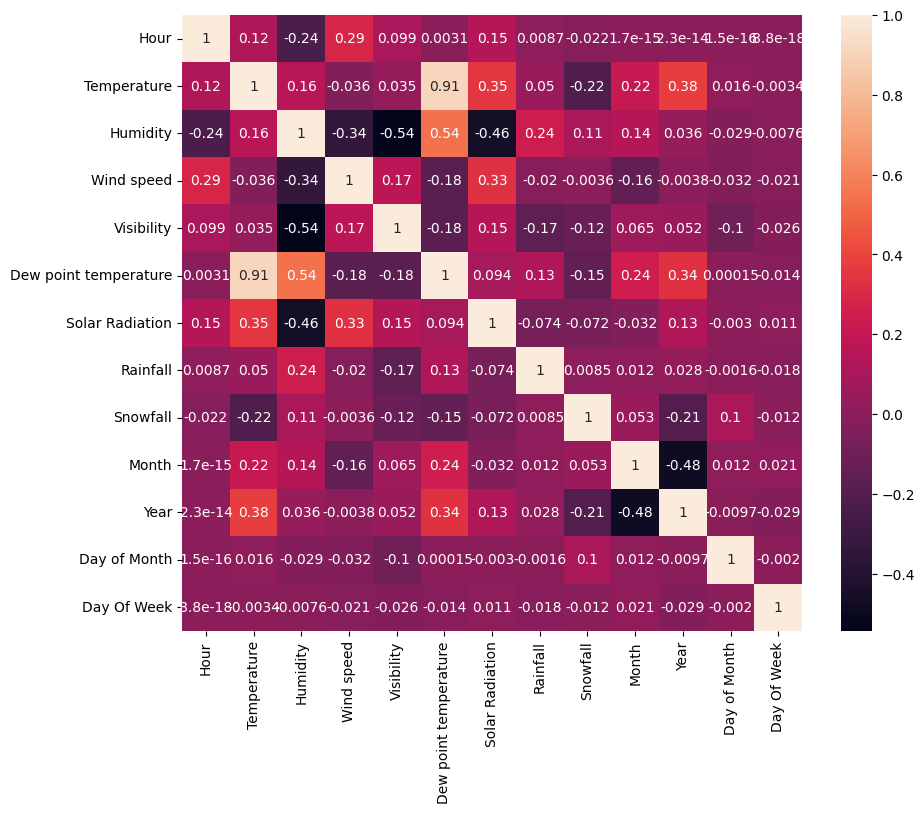

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(X[numeric_features].corr(), annot=True)
plt.show()

Отметим, очень высокую корреляцию между Temperature и Dew point temperature. Также можно заметить выраженную корреляцию между Humidity и Solar Radiation, а также между Humidity и Visibility

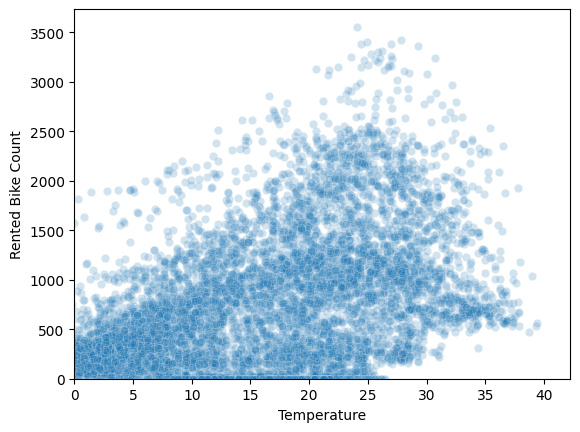

<IPython.core.display.Javascript object>

In [42]:
ax = sns.scatterplot(data=df, x="Temperature", y="Rented Bike Count", alpha=0.2)
ax.set_xlim([0, None])
ax.set_ylim([0, None])
plt.show()

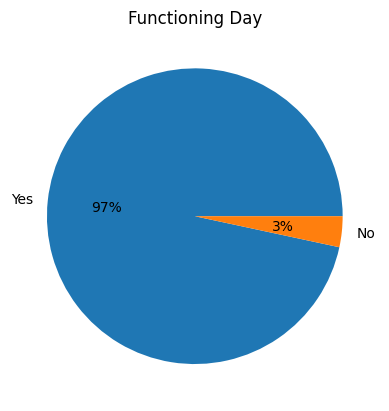

<IPython.core.display.Javascript object>

In [44]:
series = df["Functioning Day"].value_counts()
plt.title("Functioning Day")
plt.pie(series.values, labels=series.index, autopct="%.f%%")

<AxesSubplot: xlabel='Functioning Day', ylabel='Rented Bike Count'>

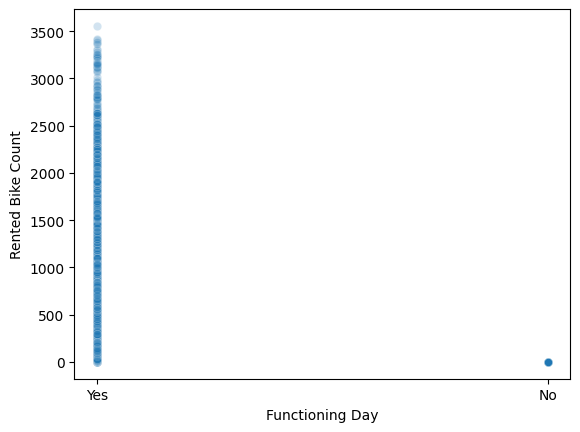

<IPython.core.display.Javascript object>

In [45]:
sns.scatterplot(data=df, x="Functioning Day", y="Rented Bike Count", alpha=0.2)

In [46]:
df.groupby("Functioning Day").sum()["Rented Bike Count"].sort_values(
    ascending=False
).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


<IPython.core.display.Javascript object>

**Note**: если день нерабочий, то велосипеды никто не арендует, но такой случай нам не интересен

In [47]:
df.drop(df[df["Functioning Day"] == "No"].index, inplace=True)
df.drop(columns=["Functioning Day"], inplace=True)

<IPython.core.display.Javascript object>

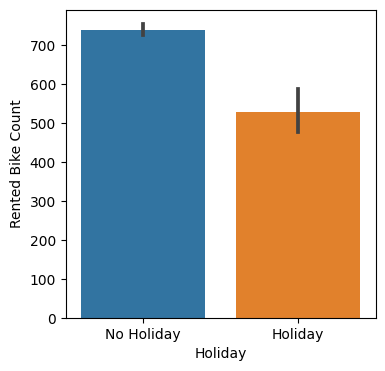

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(4, 4))
ax = sns.barplot(x="Holiday", y="Rented Bike Count", data=df)

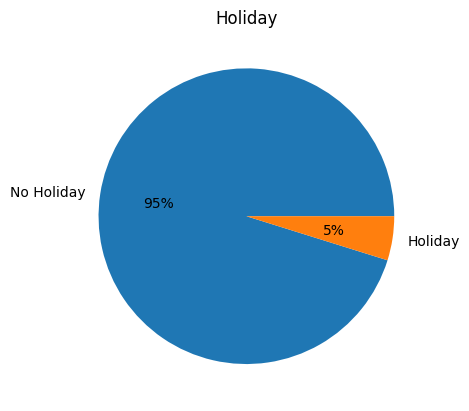

<IPython.core.display.Javascript object>

In [49]:
series = df["Holiday"].value_counts()
plt.title("Holiday")
plt.pie(series.values, labels=series.index, autopct="%.f%%")

In [50]:
y = df["Rented Bike Count"]
X = df.drop(columns=["Rented Bike Count"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)
numeric_data = X.select_dtypes([np.number])
cat_data = X.select_dtypes(["object"])
numeric_features = numeric_data.columns
cat_features = cat_data.columns

<IPython.core.display.Javascript object>

### Анализ целевой переменной

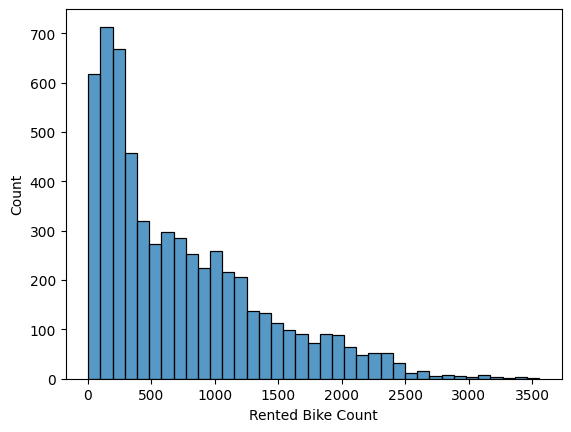

<IPython.core.display.Javascript object>

In [52]:
sns.histplot(y_train)

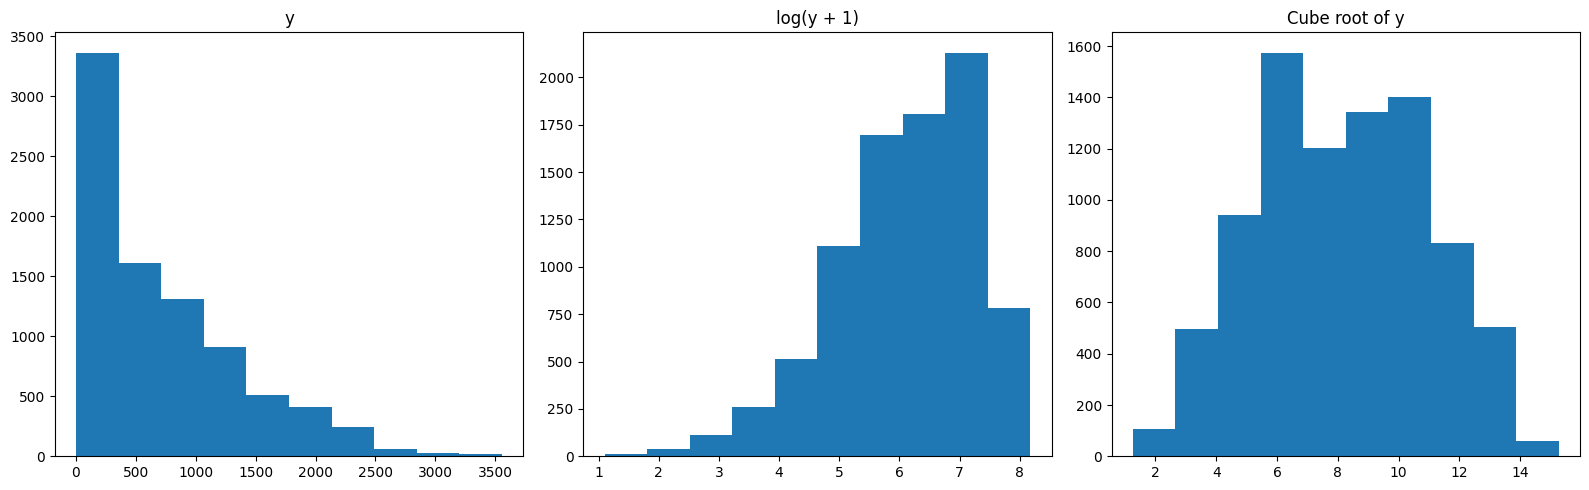

<IPython.core.display.Javascript object>

In [53]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, (transform, title) in enumerate(
    [(lambda x: x, "y"), (np.log1p, "log(y + 1)"), (np.cbrt, "Cube root of y")]
):
    axs[i].hist(transform(y))
    axs[i].set_title(title)
plt.tight_layout()

Преобразуем целевую переменную, используя кубический корень

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

y = np.cbrt(df["Rented Bike Count"])
X = df.drop(columns=["Rented Bike Count", "Dew point temperature"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

numeric_data = X.select_dtypes([np.number])
cat_data = X.select_dtypes(["object"])
numeric_features = numeric_data.columns
cat_features = cat_data.columns

<IPython.core.display.Javascript object>

In [55]:
def print_metrics(y_true, y_pred, sample_name, predictor_name):
    print(
        f"{sample_name} MSE with {predictor_name} predictor = {mean_squared_error(y_true, y_pred, squared=True):.2f}"
    )
    print(
        f"{sample_name} RMSE with {predictor_name} predictor = {mean_squared_error(y_true, y_pred, squared=False):.2f}"
    )
    print(
        f"{sample_name} R^2 with {predictor_name} predictor = {r2_score(y_true, y_pred):.2f}"
    )

<IPython.core.display.Javascript object>

## Построение моделей

In [56]:
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

<IPython.core.display.Javascript object>

### RFE

Проверим, что RFECV уменьшает количество признаков

In [57]:
column_transformer = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
        ("scaling", StandardScaler(), numeric_features),
    ]
)

pipe_without_rfe = Pipeline(
    steps=[
        ("ohe_and_scaling", column_transformer),
    ]
)

pipe_with_rfe = Pipeline(
    steps=[
        ("ohe_and_scaling", column_transformer),
        (
            "rfe",
            RFECV(estimator=Ridge()),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [58]:
pipe_without_rfe.fit_transform(X_train, y_train).shape

(5925, 16)

<IPython.core.display.Javascript object>

In [59]:
pipe_with_rfe.fit_transform(X_train, y_train).shape

(5925, 12)

<IPython.core.display.Javascript object>

Далее будем встраивать шаг исключения фичей в пайплайны, но поскольку реализованные модели не имеют интерфейс sklearn, везде будем использовать Ridge в качестве estimator'а для RFECV.

### Константная модель

In [60]:
constant_test_pred = y_train.mean() * np.ones(y_test.size)
constant_train_pred = y_train.mean() * np.ones(y_train.size)

print_metrics(y_test, constant_test_pred, "Test", "constant")
print()
print_metrics(y_train, constant_train_pred, "Train", "constant")

Test MSE with constant predictor = 7.92
Test RMSE with constant predictor = 2.82
Test R^2 with constant predictor = -0.00

Train MSE with constant predictor = 7.65
Train RMSE with constant predictor = 2.77
Train R^2 with constant predictor = -0.00


<IPython.core.display.Javascript object>

### Пайплайны

Построим пайплайны, состоящие из следующих шагов:
- скалирование численных характеристик и one-hot кодирование категориальных;
- рекурсивное исключение характеристик при помощи RFECV;
- Регрессия.

In [61]:
def plot_actual_and_predicted(y_pred, y_test):
    ax = sns.relplot(x=y_pred, y=y_test, alpha=0.25, height=5, aspect=1)
    ax.set(xlim=[0, None])
    ax.set(ylim=[0, None])
    ax.set(xlabel="Predicted y")
    ax.set(ylabel="Actual y")
    ax.set(title="Actual vs Predicted")
    plt.show()

<IPython.core.display.Javascript object>

In [62]:
def create_sklearn_ridge(alpha=1.0):
    column_transformer = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
            ("scaling", StandardScaler(), numeric_features),
        ]
    )

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=Ridge(alpha))),
            ("regression", Ridge(alpha)),
        ]
    )
    return pipeline


def create_full_descent_ridge():
    full_descent = GradientDescent(
        learning_rate=lambda k: 1 / (k + 1),
        regularization=lambda w: np.linalg.norm(w) ** 2,
        alpha=0.0001,
    )

    column_transformer = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
            ("scaling", StandardScaler(), numeric_features),
        ]
    )

    ridge_full_descent_pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            (
                "rfe",
                RFECV(estimator=Ridge()),
            ),
            (
                "regression",
                MyLinearRegression(
                    full_descent,
                    0.0001,
                    500,
                ),
            ),
        ]
    )

    return ridge_full_descent_pipeline


def create_stochastic_descent_ridge():
    stoch_descent = StochasticGradientDescent(
        learning_rate=lambda k: 1 / (k + 1),
        regularization=lambda w: 0 * np.linalg.norm(w) ** 2,
        alpha=0.0001,
    )

    column_transformer = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
            ("scaling", StandardScaler(), numeric_features),
        ]
    )

    ridge_stoch_descent_pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            (
                "rfe",
                RFECV(estimator=Ridge()),
            ),
            (
                "regression",
                MyLinearRegression(
                    stoch_descent,
                    0.0001,
                    500,
                ),
            ),
        ]
    )

    return ridge_stoch_descent_pipeline


def create_minibatch_descent_ridge():
    minibatch_descent = MiniBatchGradientDescent(
        learning_rate=lambda k: 1 / (k + 1),
        regularization=lambda w: np.linalg.norm(w) ** 2,
        alpha=0.0001,
        batch_size=100,
    )

    column_transformer = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
            ("scaling", StandardScaler(), numeric_features),
        ]
    )

    ridge_minibatch_descent_pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            (
                "rfe",
                RFECV(estimator=Ridge()),
            ),
            (
                "regression",
                MyLinearRegression(
                    minibatch_descent,
                    0.0001,
                    500,
                ),
            ),
        ]
    )

    return ridge_minibatch_descent_pipeline

<IPython.core.display.Javascript object>

### Ridge (sklearn)

In [63]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_sklearn_ridge(),
    [{"regression__alpha": alphas}],
    scoring="neg_root_mean_squared_error",
    cv=10,
)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]

<IPython.core.display.Javascript object>

In [64]:
model = create_sklearn_ridge(best_alpha)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [65]:
print_metrics(y_test, y_pred, "Test", "Ridge")

Test MSE with Ridge predictor = 2.97
Test RMSE with Ridge predictor = 1.72
Test R^2 with Ridge predictor = 0.63


<IPython.core.display.Javascript object>

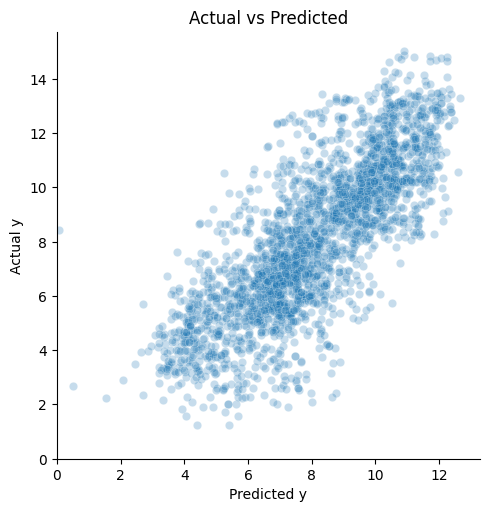

<IPython.core.display.Javascript object>

In [66]:
plot_actual_and_predicted(y_pred, y_test)

### My Full Descent Ridge

In [67]:
ridge_full_descent_pipeline = create_full_descent_ridge()


full_desc_model = ridge_full_descent_pipeline.fit(X_train, y_train)
y_pred_full_desc = full_desc_model.predict(X_test)
print_metrics(y_test, y_pred_full_desc, "Test", "MyRidge")

Test MSE with MyRidge predictor = 3.38
Test RMSE with MyRidge predictor = 1.84
Test R^2 with MyRidge predictor = 0.57


<IPython.core.display.Javascript object>

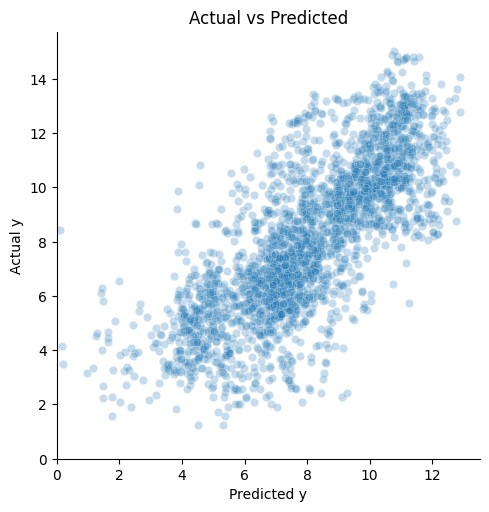

<IPython.core.display.Javascript object>

In [68]:
plot_actual_and_predicted(y_pred_full_desc, y_test)

### My Stochastic Descent Ridge

In [69]:
ridge_stoch_descent_pipeline = create_stochastic_descent_ridge()

stoch_desc_model = ridge_stoch_descent_pipeline.fit(X_train, y_train)
y_pred_stoch_desc = stoch_desc_model.predict(X_test)
print_metrics(y_test, y_pred_stoch_desc, "Test", "StochRidge")

Test MSE with StochRidge predictor = 100488.36
Test RMSE with StochRidge predictor = 317.00
Test R^2 with StochRidge predictor = -12692.81


<IPython.core.display.Javascript object>

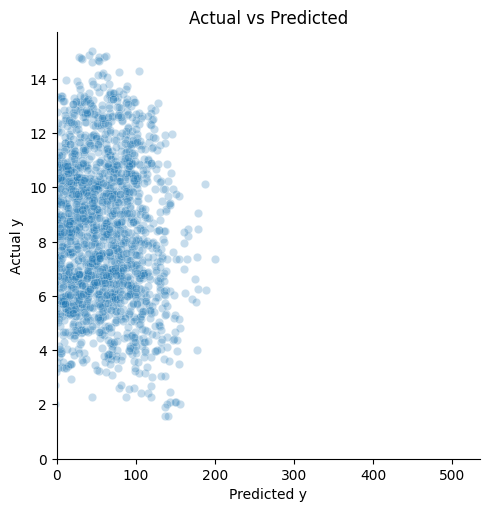

<IPython.core.display.Javascript object>

In [70]:
plot_actual_and_predicted(y_pred_stoch_desc, y_test)

### My Minibatch Descent Ridge

In [71]:
ridge_minibatch_descent_pipeline = create_minibatch_descent_ridge()

minibatch_desc_model = ridge_minibatch_descent_pipeline.fit(X_train, y_train)
y_pred_minibatch = minibatch_desc_model.predict(X_test)
print_metrics(y_test, y_pred_minibatch, "Test", "MiniBatchRidge")

Test MSE with MiniBatchRidge predictor = 3.79
Test RMSE with MiniBatchRidge predictor = 1.95
Test R^2 with MiniBatchRidge predictor = 0.52


<IPython.core.display.Javascript object>

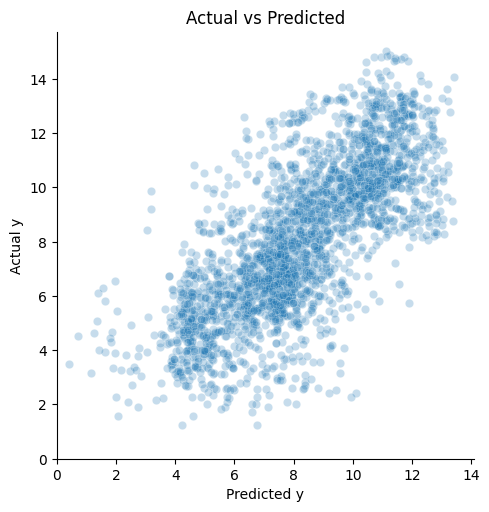

<IPython.core.display.Javascript object>

In [72]:
plot_actual_and_predicted(y_pred_minibatch, y_test)

### Кросс-валидация

In [73]:
from sklearn.model_selection import cross_validate

<IPython.core.display.Javascript object>

In [74]:
def postrocess_scores(scores):
    scores["test_mse"] = -scores["test_neg_mse"]
    scores["train_mse"] = -scores["train_neg_mse"]
    scores["test_rmse"] = -scores["test_neg_rmse"]
    scores["train_rmse"] = -scores["train_neg_rmse"]
    for key in [
        "test_neg_mse",
        "train_neg_mse",
        "test_neg_rmse",
        "train_neg_rmse",
        "score_time",
        "fit_time",
    ]:
        scores.pop(key, None)


def create_dataframe(scores):

    data = pd.DataFrame.from_dict(scores)
    index = [f"Fold {i + 1}" for i in range(data.shape[0])]
    data = data.append(data.mean(), ignore_index=True)
    index.append("E")
    data = data.append(data.std(), ignore_index=True)
    index.append("STD")
    data.set_index([index], inplace=True)
    return data

<IPython.core.display.Javascript object>

In [75]:
scoring = {
    "neg_rmse": "neg_root_mean_squared_error",
    "neg_mse": "neg_mean_squared_error",
    "r2": "r2",
}

sklearn_cv_scores = cross_validate(
    create_sklearn_ridge(),
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
)
postrocess_scores(sklearn_cv_scores)
create_dataframe(sklearn_cv_scores)

,test_r2,train_r2,test_mse,train_mse,test_rmse,train_rmse
Fold 1,0.6466,0.6310,2.7189,2.8189,1.6489,1.6790
Fold 2,0.6097,0.6393,2.9416,2.7702,1.7151,1.6644
Fold 3,0.6205,0.6377,2.9455,2.7623,1.7162,1.6620
Fold 4,0.6482,0.6307,2.6574,2.8339,1.6302,1.6834
Fold 5,0.6315,0.6345,2.8377,2.7922,1.6845,1.6710
E,0.6313,0.6347,2.8202,2.7955,1.6790,1.6720
STD,0.0148,0.0035,0.1162,0.0275,0.0347,0.0082


<IPython.core.display.Javascript object>

In [76]:
full_descent_cv_scores = cross_validate(
    create_full_descent_ridge(),
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
)
postrocess_scores(full_descent_cv_scores)
create_dataframe(full_descent_cv_scores)

,test_r2,train_r2,test_mse,train_mse,test_rmse,train_rmse
Fold 1,0.5935,0.5675,3.1270,3.3040,1.7683,1.8177
Fold 2,0.5452,0.5807,3.4279,3.2201,1.8514,1.7945
Fold 3,0.5666,0.5767,3.3642,3.2275,1.8342,1.7965
Fold 4,0.5912,0.5700,3.0878,3.2999,1.7572,1.8166
Fold 5,0.5571,0.5763,3.4104,3.2371,1.8467,1.7992
E,0.5707,0.5743,3.2834,3.2577,1.8116,1.8049
STD,0.0189,0.0048,0.1458,0.0365,0.0404,0.0101


<IPython.core.display.Javascript object>

In [77]:
minibatch_cv_scores = cross_validate(
    create_minibatch_descent_ridge(),
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
)
postrocess_scores(minibatch_cv_scores)
create_dataframe(minibatch_cv_scores)

,test_r2,train_r2,test_mse,train_mse,test_rmse,train_rmse
Fold 1,0.5807,0.5531,3.2255,3.4142,1.7960,1.8478
Fold 2,0.5323,0.5524,3.5250,3.4380,1.8775,1.8542
Fold 3,0.5508,0.5655,3.4864,3.3125,1.8672,1.8200
Fold 4,0.5402,0.5191,3.4730,3.6910,1.8636,1.9212
Fold 5,0.4912,0.5308,3.9180,3.5841,1.9794,1.8932
E,0.5391,0.5442,3.5256,3.4880,1.8767,1.8673
STD,0.0290,0.0168,0.2229,0.1336,0.0589,0.0357


<IPython.core.display.Javascript object>

In [78]:
stochastic_cv_scores = cross_validate(
    create_stochastic_descent_ridge(),
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
)
postrocess_scores(stochastic_cv_scores)
create_dataframe(stochastic_cv_scores)

,test_r2,train_r2,test_mse,train_mse,test_rmse,train_rmse
Fold 1,-109.5100,-111.6701,850.1887,860.7839,29.1580,29.3391
Fold 2,-14024.9832,-12431.2357,105715.5105,95485.8165,325.1392,309.0078
Fold 3,-19080.3777,-19594.0951,148099.5029,149404.5920,384.8370,386.5289
Fold 4,-245.4141,-246.6972,1861.3041,1900.9522,43.1428,43.5999
Fold 5,-30699.1325,-36225.6444,236409.4022,276754.1463,486.2195,526.0743
E,-12831.8835,-13721.8685,98587.1817,104881.2582,253.6993,258.9100
STD,11661.7645,13486.1889,89895.1197,102991.3528,184.9969,194.5427


<IPython.core.display.Javascript object>

Видно, что в этом случае одного элемента недостаточно, чтобы определить направление антиградиента